In [3]:
import tensorflow as tf
from cnnmodel import CNNModel

In [4]:
# Open Model
cnnmodel = CNNModel(modelname="classification", filename="simple_noarg.h5", modelkind='simple', image_argumentation=False)
# cnnmodel = CNNModel(modelname="classification", filename="simple_args.h5", modelkind='simple', image_argumentation=True)
# cnnmodel = CNNModel(modelname="grade", filename="simple.h5", modelkind='simple', image_argumentation=False)

Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [ ]:
cnnmodel.model.summary()
tf.keras.utils.plot_model(cnnmodel.model, show_shapes=True, show_layer_names=True)

NameError: name 'cnnmodel' is not defined

In [ ]:
history = cnnmodel.train(epochs=100, callback_patience=20)

Epoch 1/100


/Users/gana-pt6678/anaconda3/envs/cancerdiagnosis/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


625/625 [==============================] - 867s 1s/step - loss: 0.8680 - accuracy: 0.7422 - val_loss: 0.5286 - val_accuracy: 0.8068
Epoch 2/100
625/625 [==============================] - 861s 1s/step - loss: 0.3513 - accuracy: 0.8695 - val_loss: 0.3123 - val_accuracy: 0.8830
Epoch 3/100
625/625 [==============================] - 42387s 68s/step - loss: 0.2581 - accuracy: 0.9087 - val_loss: 0.2502 - val_accuracy: 0.9132
Epoch 4/100
549/625 [=========================>....] - ETA: 1:22 - loss: 0.1649 - accuracy: 0.9413

KeyboardInterrupt: 

In [ ]:
print("Evaluating model:")
print(cnnmodel.model.evaluate(cnnmodel.validation_generator))

Evaluating model:
6/6 [==============================] - 9s 1s/step - loss: 0.4119 - accuracy: 0.8684
[0.41186243295669556, 0.8684210777282715]


In [ ]:
cnnmodel.save(filename=None)

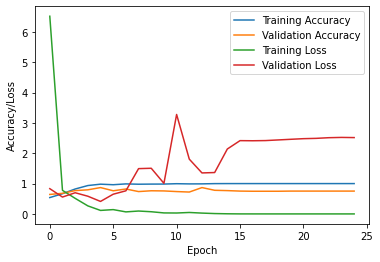

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()
plt.savefig(cnnmodel.filename + "_history.png")

In [ ]:
# cnnmodel.predict(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img("test.jpg", target_size=(512, 512))) / 255.0)